In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv(r"B:\VIRTUAL DS INTERSHIP\Cognifiz -INTERN\Dataset .csv")
pd.option_context('display.max_columns', None)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL-2 (Task-1)
# Task: Table Booking and Online Delivery

#### Determine percentage of restaurents that offer table booking and online delivery.

In [179]:
#calculating the percentage of restaurents that offers table booking
table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / len(df)*100
print(f"precentage of restaurent that offers table booking: {table_booking_percentage:.2f}%")

precentage of restaurent that offers table booking: 12.12%


In [180]:
#calculating the percentage of restaurants thet offers online delivery
online_delivery_percentage = (df["Has Online delivery"]== 'Yes').sum() / len(df)*100
print(f"percentage of restaurants that offers Online delivery: {online_delivery_percentage:.2f}%")

percentage of restaurants that offers Online delivery: 25.66%


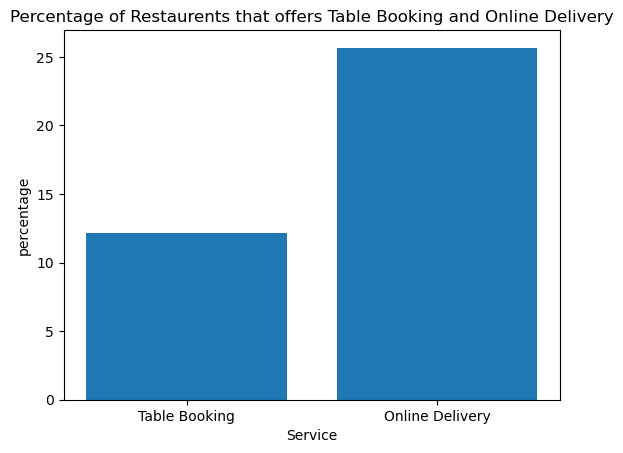

In [181]:
# Creating the bar plot
plt.bar(['Table Booking', 'Online Delivery'], [table_booking_percentage, online_delivery_percentage])
plt.xlabel('Service')
plt.ylabel('percentage')
plt.title('Percentage of Restaurents that offers Table Booking and Online Delivery')
plt.show()

### Compare the average rating of restaurants with table booking and those wothout.

In [139]:
# Calculate the average rating of restaurants with table booking
table_booking_avg_rating = df[df['Has Table booking'] == 'Yes'] ['Aggregate rating'].mean()
print(f"Average rating of restaurents with table booking: {table_booking_avg_rating:.2f}")

Average rating of restaurents with table booking: 3.44


In [140]:
#calculating the average rating of restaurantes without table booking
without_table_booking_avg_rating = df[df['Has Table booking'] == 'No'] ['Aggregate rating'].mean()
print(f"Averager rating of restaurants without table booking: {without_table_booking_avg_rating:.2f}")

Averager rating of restaurants without table booking: 2.56


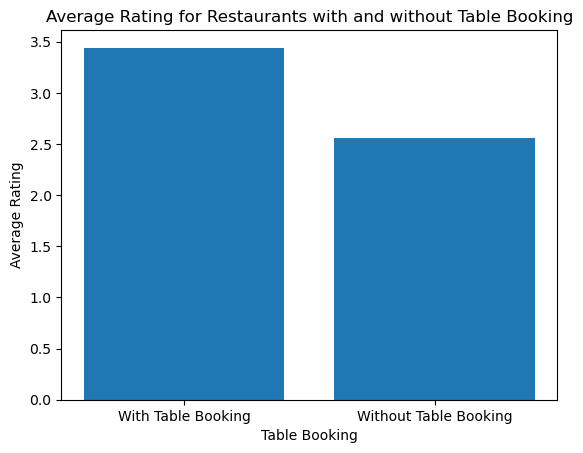

In [141]:
# Ploting the bar plot
plt.bar(['With Table Booking', 'Without Table Booking'], [table_booking_avg_rating, without_table_booking_avg_rating])
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.title('Average Rating for Restaurants with and without Table Booking')
plt.show()

### Analysing the availability of online delivery among  restaurents with different price ranges

In [142]:
print(df['Price range'].value_counts())

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


In [143]:
online_delivery_percentage = df.groupby('Price range') ['Has Online delivery'].apply(lambda x: (x == 'Yes').sum() / len(x)*100)
print(online_delivery_percentage)

Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64


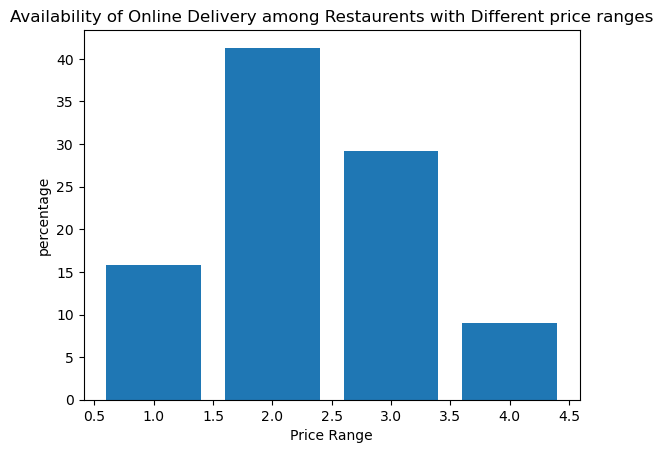

In [144]:
# creating a bar plot
plt.bar(online_delivery_percentage.index, online_delivery_percentage.values)
plt.xlabel('Price Range')
plt.ylabel('percentage')
plt.title('Availability of Online Delivery among Restaurents with Different price ranges')
plt.show()

# Task-2: Price range analysis

### Determine the most common price range among all the restaurants

In [146]:
most_common_price_range = df['Price range'].mode().values[0]
print(f"most common price range is: {most_common_price_range}")

most common price range is: 1


### Calculate the average rating for each price range.

In [147]:
average_ratings= df.groupby('Price range')['Aggregate rating'].mean()
print(average_ratings)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


### Identify the color that represents the highest average rating among different price ranges.

In [148]:
avg_ratings = df.groupby(['Rating color', 'Price range']) ['Aggregate rating'].mean().reset_index()

In [149]:
# sort the average rating in decending order
agv_ratings = avg_ratings.sort_values('Aggregate rating', ascending = False)
print(avg_ratings)

   Rating color  Price range  Aggregate rating
0    Dark Green            1          4.668750
1    Dark Green            2          4.627536
2    Dark Green            3          4.646032
3    Dark Green            4          4.709459
4         Green            1          4.157639
5         Green            2          4.159385
6         Green            3          4.169231
7         Green            4          4.188144
8        Orange            1          3.040464
9        Orange            2          3.048491
10       Orange            3          3.097764
11       Orange            4          3.162376
12          Red            1          2.293548
13          Red            2          2.300000
14          Red            3          2.305000
15          Red            4          2.283333
16        White            1          0.000000
17        White            2          0.000000
18        White            3          0.000000
19        White            4          0.000000
20       Yell

#### To get the specific column with the highest average rating.

In [150]:
# get the  row with the highest average rating
best_color = avg_ratings.iloc[0]

In [151]:
print('The color with the highest average rating is: ', best_color['Rating color'])

The color with the highest average rating is:  Dark Green


In [183]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## TASK-3: Featue Engineering

In [184]:
# checking for the missing values
missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


There are 9 missing values in 'Cuisines' column.

In [185]:
# handling the missing values
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

All the missing values are been imputed, there are no missiing values in the data.

In [186]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [198]:
categorical_Columns = ['Country code', 'City', 'Currency', 'Has Table booking',
                       'Has Online delivery', 'Is delivering now', 'Rating color',
                       'Rating text', 'Address', 'Locality', 'Switch to order menu']

numerical_columns = ['Average Cost for two', 'Price range', 'Votes', 'Longitude',
                     'Latitude', 'Restaurant ID']

## Encoding the Categorical features

In [192]:
label_encoders= {}
categorical_columns =[
    'Country Code', 'City', 'Currency', 'Has Table booking', 'Has Online delivery',
    'Is delivering now','Rating color', 'Rating text', 'Switch to order menu']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Standard scaling for the numerical features

In [193]:
numeric_columns = ['Average Cost for two', 'Price range', 'Votes', 'Longitude',
                   'Latitude', 'Restaurant ID']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Create new derived features

In [194]:
# Customer value (Votes weighted by price range)
df['Customer Value'] = df['Votes'] * df['Price range']

In [195]:
# Population score (Aggregation Rating * Votes)
df['Population Score'] = df['Aggregate rating'] * df['Votes']

## Droping irrelavent columns

In [196]:
irrelavent_columns = ['Locality Verbose']
df = df.drop(columns = irrelavent_columns)

In [197]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Customer Value,Population Score
0,-0.310940,Le Petit Souffle,6,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",1.372269,-1.025581,"French, Japanese, Desserts",-0.006154,...,0,0,0,1.319803,4.8,0,1,0.365202,0.481994,1.752968
1,-0.312458,Izakaya Kikufuji,6,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",1.371945,-1.026647,Japanese,0.000049,...,0,0,0,1.319803,4.5,0,1,1.009168,1.331903,4.541256


## Extracting Additional Features

In [165]:
# Length of the restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

In [166]:
# Lenght of the address
df['Address Length'] = df['Address'].apply(len)

In [127]:
# Count of words in cuisines
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))

In [128]:
# Wether restaurent offers Multiple Cuisines
df['Multiple Cuisines'] = df['Cuisine Count'].apply(lambda x: 1 if x>1 else 0)

In [129]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Aggregate rating,Rating color,Rating text,Votes,Customer Value,Population Score,Restaurant Name Length,Address Length,Cuisine Count,Multiple Cuisines
0,-0.310940,Le Petit Souffle,6,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",1.372269,-1.025581,"French, Japanese, Desserts",-0.006154,...,4.8,0,1,0.365202,0.481994,1.752968,16,71,3,1
1,-0.312458,Izakaya Kikufuji,6,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",1.371945,-1.026647,Japanese,0.000049,...,4.5,0,1,1.009168,1.331903,4.541256,16,67,1,0
2,-0.312946,Heat - Edsa Shangri-La,6,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",1.372975,-1.024131,"Seafood, Asian, Filipino, Indian",0.173743,...,4.4,1,5,0.262911,0.637320,1.156808,22,56,4,1
3,-0.310841,Ooma,6,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",1.372966,-1.023775,"Japanese, Sushi",0.018659,...,4.9,0,1,0.483766,1.172692,2.370453,4,70,2,1
4,-0.311319,Sambo Kojin,6,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",1.372991,-1.023854,"Japanese, Korean",0.018659,...,4.8,0,1,0.167595,0.406264,0.804454,11,64,2,1


## Creat new features like "Has Table Booking" or 'Has Online Delivery' by encoding categoric variables.

In [130]:
# creating new features from Has Table Booking and Has Online Delivery
df['Has_Table_Booking_and_Onlline_Delivery'] = df['Has Table booking'] * df['Has Online delivery']

In [131]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Rating color,Rating text,Votes,Customer Value,Population Score,Restaurant Name Length,Address Length,Cuisine Count,Multiple Cuisines,Has_Table_Booking_and_Onlline_Delivery
0,-0.310940,Le Petit Souffle,6,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",1.372269,-1.025581,"French, Japanese, Desserts",-0.006154,...,0,1,0.365202,0.481994,1.752968,16,71,3,1,0
1,-0.312458,Izakaya Kikufuji,6,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",1.371945,-1.026647,Japanese,0.000049,...,0,1,1.009168,1.331903,4.541256,16,67,1,0,0
2,-0.312946,Heat - Edsa Shangri-La,6,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",1.372975,-1.024131,"Seafood, Asian, Filipino, Indian",0.173743,...,1,5,0.262911,0.637320,1.156808,22,56,4,1,0
3,-0.310841,Ooma,6,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",1.372966,-1.023775,"Japanese, Sushi",0.018659,...,0,1,0.483766,1.172692,2.370453,4,70,2,1,0
4,-0.311319,Sambo Kojin,6,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",1.372991,-1.023854,"Japanese, Korean",0.018659,...,0,1,0.167595,0.406264,0.804454,11,64,2,1,0
